In [2]:
import csv
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('nobel_laureates_data.csv')

The code below shows how the nobel_laureates_data.csv set physically looks. Looking at the first few rows and the columns of the csv file, you can start asking questions about the data.

In [6]:
df.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


The barplot below shows how many Laureates were born per country. It only shows the countries where more than 5 Laureates were born because otherwise the bar plot would be unreadable. This will be a decision I have made in more barplots. 

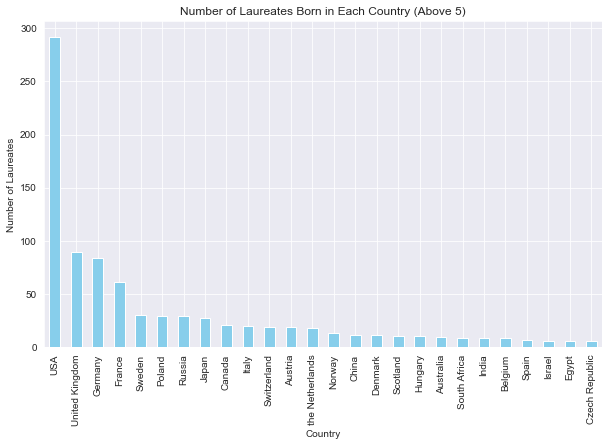

In [19]:
born_country_counts = df['bornCountry'].value_counts()


born_country_counts_above_5 = born_country_counts[born_country_counts > 5]

plt.figure(figsize=(10, 6))
born_country_counts_above_5.plot(kind="bar", color="skyblue")
plt.title("Number of Laureates Born in Each Country (Above 5)")
plt.xlabel("Country")
plt.ylabel("Number of Laureates")
plt.show()

The code below shows the total distribution of Nobel price Laureates by gender in percentages. The 'third gender', 'org' shows that not only people have won the nobel prize, but also organizations so they cant be gendered. 

Text(0, 0.5, 'Percentage of Laureates')

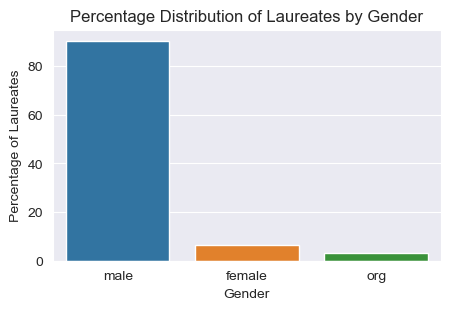

In [18]:
gender_percentages = df['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)
plt.title('Percentage Distribution of Laureates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Laureates')



The code below specifically looks at the gender distribution of Laureates in Sweden. You could change the code to another country to see how the gender is distributed percentage wise.

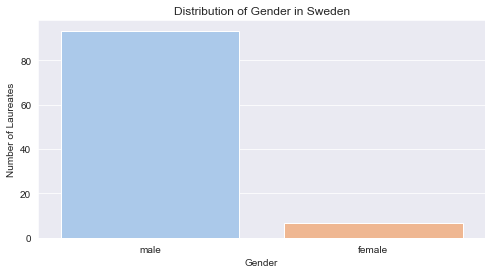

In [30]:
sweden_data = df[df['bornCountry'] == 'Sweden']

gender_distribution_sweden = sweden_data['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
sns.barplot(x=gender_distribution_sweden.index, y=gender_distribution_sweden.values, palette='pastel')
plt.title('Distribution of Gender in Sweden')
plt.xlabel('Gender')
plt.ylabel('Number of Laureates')
plt.show()

The two bar plots below show the Number of Laureates by the Country their organization is from. One shows the absolute number of laureates, the other one shows the percentages. I have decided to only show the countries that have a laureate count of > 5 or a percentage of > 2% because otherwise the barplot would be near unreadable because of all of the countries shown.

The last part of the matplotlib code rotates the names of the countries slightly so they do not interfere, making it more readable.

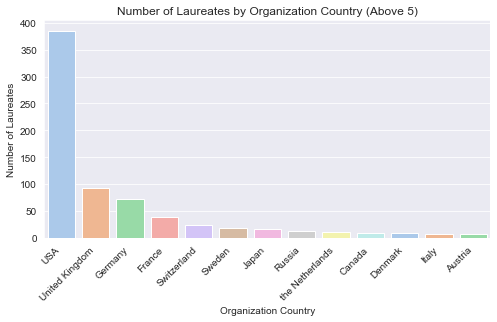

In [24]:
org_country_counts = df['organizationCountry'].value_counts()

org_country_counts_above_5 = org_country_counts[org_country_counts > 5]

plt.figure(figsize=(8, 4))
sns.barplot(x=org_country_counts_above_5.index, y=org_country_counts_above_5.values, palette='pastel')
plt.title('Number of Laureates by Organization Country (Above 5)')
plt.xlabel('Organization Country')
plt.ylabel('Number of Laureates')
plt.xticks(rotation=45, ha='right') 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Switzerland'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Japan')])

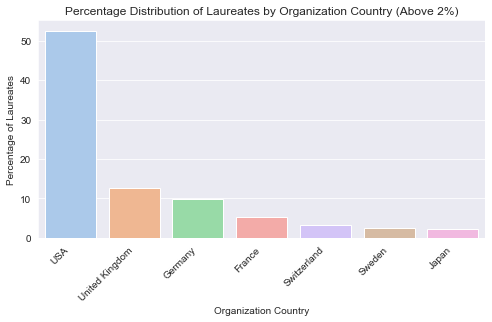

In [31]:
org_country_percentages = df['organizationCountry'].value_counts(normalize=True) * 100

org_country_percentages_above_2 = org_country_percentages[org_country_percentages > 2]

plt.figure(figsize=(8, 4))
sns.barplot(x=org_country_percentages_above_2.index, y=org_country_percentages_above_2.values, palette='pastel')
plt.title('Percentage Distribution of Laureates by Organization Country (Above 2%)')
plt.xlabel('Organization Country')
plt.ylabel('Percentage of Laureates')
plt.xticks(rotation=45, ha='right')

The code below shows the percentage of male and female Laureates in the Medicine Category. You could replicate this code for every category to see if it is different per category. 

Text(0, 0.5, 'Percentage of Laureates')

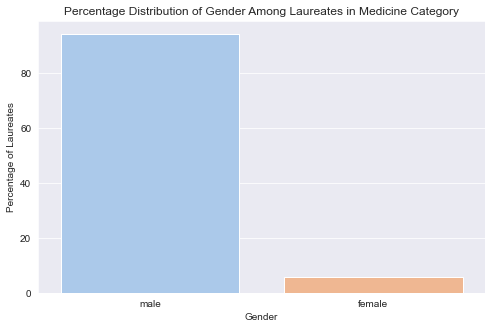

In [22]:
medicine_df = df[df['category'] == 'medicine']

gender_percentages_medicine = medicine_df['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_percentages_medicine.index, y=gender_percentages_medicine.values, palette='pastel')
plt.title('Percentage Distribution of Gender Among Laureates in Medicine Category')
plt.xlabel('Gender')
plt.ylabel('Percentage of Laureates')


It could be an interesting question to find out how many women have won a nobel price, in which year, and how many per year. It would be interesting to plot this out on a bar chart, but this would lead to more than a hundred bars. For this reason, the code below shows a table in which you can see the nobel price winners which are female per year, but it only shows the years in which women have won to not have around a 100s of rows. 

In [13]:
female_winners = df[df['gender'] == 'female']
female_winners_per_year = female_winners.groupby('year').size()
table_df = pd.DataFrame({
    'Year': female_winners_per_year.index,
    'Number of Female Winners': female_winners_per_year.values
})
display(table_df)

,Year,Number of Female Winners
0,1903,1
1,1905,1
2,1909,1
3,1911,1
4,1926,1
5,1928,1
6,1931,1
7,1935,1
8,1938,1
9,1945,1
